<a href="https://colab.research.google.com/github/esmu26/Parliament-Topic-Classification/blob/main/Classification_of_Parliament_debate_and_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Business Understanding
#1.1 Background
*In the Zambian parliment(National Assembly), responses to debates and proceedings cover a broad range of topics, reflecting the various funtions parliament, which include legislation,oversight, and representation.*
*Parliamentary debates are critical forums for discussing national issues, shaping policies, and making government decisions. The proceedings often generate vast amounts of unstructured text data. Manually categorizing these debates into specific topics is time-consuming and prone to human bias.*

*Automating this classification can:*

*- Help journalists quickly find relevant content.*

*- Assist political analysts in identfying trends over time.*

*- Improve public accessibility and transparency in governance.*

## 1.2 Business Objective
*The primary goal is to develop an NLP-based classification system that automatically assigns topics to reponses in parliamentary debates and proceedings.*

*This will:*

*- **Reduce time** required for manually for classification.*

*- **Increase accuracy** in topic labeling.*

*- **Enable faster** policy trend analysis.*

## 1.3 Problem Statement
*Parliamentary debate transcripts contains discussions on diverse topics such as healthcare, education, economy, environment, and security. currently, categorizing these reponses manually is resource-intensive. This project aims to apply Natural Language Processing and Machine Learning techniques to automatically classify debates responses into predefined topics, thereby improving accessibility, transparency, and efficiency in parliamentary data analysis.*

## 1.4 Project Scope
**In-Scope:**

*- Collecting and preprocessing parliamentary debate datasets.*

*- Extracting relevant features from textual data.*

*- Applying machine learning classification algorithms.*

*- Evaluating model performance using accuracy , precision, recall, and F1-score.*

**Out-of-Scope**

*- Sentiment analysis of responses.*

*- Live real-time scraping (dataset will be static for this project).*

*- multilingual processing (only English will be used unless otherwise specified ).*

# 1.5 Success Criteria
*The project will be considered successful if:*

*1. The classification model achieves >= 80% accuracy(or equivalent F1-score).*

*2. The trained model can correctly classify unseen parliamentary responses into their relevant topics.*

*3. The process is well-documented for reproducibility.*

# 1.6 Stakeholders
*- Researchers/ Analysts - Need topic summaries for policy studies.*

*- Journalists - want quick access to debates on specific issues.*

*- Parliament Staffs - Require efficient records organization.*

*- Public - Desire transparency and easier navigation of proceedings.*

# 1.7 Constraints
*- Limited availability of labeled parliamentary datasets.*

*- Potential class imbalance (some topics may have fewer examples).*

*- Variation in speaking styles and vocabulary among members.*



## 2.Data Understanding
# 2.1 Data Collection
**-Speeches/Statements**: *Responses given by Members of Parliaments(MPs).

**-Meta-data**: *such as date ,session ID,speaker, party affiliation*

**-Topic Labels**: *Each response may be labeled or can be labeled with categories such as Economy, Education, Health , Governance, Foreign policy ,etc.*

# 2.2 source of Data
-open data repositories( Kaggle ).

## 2.3 Data Exploration
*Before preprocessing ,we will explore the dataset to understand its properties:*

**- Number of records(rowS)** *- eg., 50,000 speeches.*

**-Number of unique topics** *-e.g.,Economy, Health, Education, Foreign exchange, Agriculture, etc.

**-Text Length distribution** *-Some responses may be very short(1-2 sentences), while others are long speeches.*

## 2.4 Data Quality Issues

*Some possible issues to expect:*

**-Imbalance** *in topic categories (some topics appear far more than others).*

**-Noisy text** *-includes filters,greetings, or irrelevant content("Thank you Mr. Speaker..").*

**-Spelling errors/abbreviation** *in debates.*

**-Missing data** *-some speeches may not have labeled topics.*

**-Duplicate Speeches** *-needs to check for repetition.*

   ## SUMMARY

   *The dataset is parliamentary debate transcripts labeled with topics. We wili explore distributions, checks for imbalance, and clean the text before modeling. This phase provides the foundation for Data preparation and Modeling.*


In [ ]:
import pandas as pd
file_path = '/content/loadshedding_debate_nlp_ready_v2.csv'
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Assuming the file is named 'your_file.csv' and is in the content directory
# Replace 'your_file.csv' with the actual name of your uploaded file
file_path = '/content/loadshedding_debate_nlp_ready_v2.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Date,Speaker,Role,Topic,Statement,Stance,Sentiment
0,2025-09-08,Hon. Binwell Mpundu,Member of Parliament,Loadshedding Causes,"Households are struggling, with food going bad...",Opposition,Negative
1,2025-09-08,Hon. Makozo Chikote,Minister of Energy,Impact on Households,We have instructed ZESCO to improve transparen...,Government,Positive
2,2025-09-08,Hon. Binwell Mpundu,Member of Parliament,ZESCO Management,Citizens feel the government is not transparen...,Opposition,Negative
3,2025-09-08,Hon. Makozo Chikote,Minister of Energy,Alternative Energy,Government is engaging ZESCO to prioritize pow...,Government,Positive
4,2025-09-08,Hon. Binwell Mpundu,Member of Parliament,Impact on Mining,ZESCO has been accused of inefficiency and poo...,Opposition,Negative


# Initial Column checks

*This step will help us get a quick overview of our data's structure ,including column names,data types, and missing values*


In [ ]:
# Check the data types of each column
print("Data types:")
display(df.dtypes)

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Get basic information about the DataFrame
print("\nDataFrame Info:")
display(df.info())

Data types:


,0
Date,object
Speaker,object
Role,object
Topic,object
Statement,object
Stance,object
Sentiment,object



Missing values:


,0
Date,0
Speaker,0
Role,0
Topic,0
Statement,0
Stance,0
Sentiment,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       220 non-null    object
 1   Speaker    220 non-null    object
 2   Role       220 non-null    object
 3   Topic      220 non-null    object
 4   Statement  220 non-null    object
 5   Stance     220 non-null    object
 6   Sentiment  220 non-null    object
dtypes: object(7)
memory usage: 12.2+ KB


None

# Values Counts for Topics

*This is a crucial step for understanding the distribution of categorical data ,especially a 'topic' column. Replace 'topic_column_name' with the actual name of our topic column.*

In [ ]:
# Get value counts for the 'Topic' column
topic_counts = df['Topic'].value_counts()

# Display the value counts
display(topic_counts)

,count
Topic,
ZESCO Management,31
Government Policy,26
Impact on Mining,24
Parliamentary Procedure,23
Loadshedding Causes,22
Renewable Energy,21
Public Confidence,20
Alternative Energy,19
Impact on Economy,18


## Visualization Template
*Visualizing our data can provide insights that simple value counts might miss.Here's a template for a bar plot to visualize the distribution of our topics.*

/tmp/ipython-input-1753945781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')


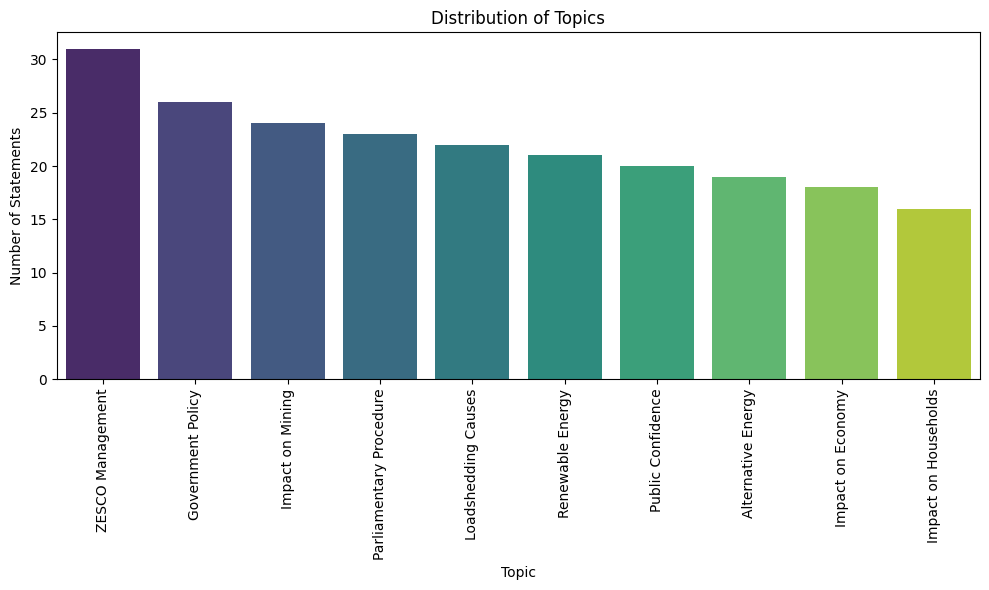

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the topic counts
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Topic')
plt.ylabel('Number of Statements')
plt.title('Distribution of Topics')
plt.tight_layout()
plt.show()

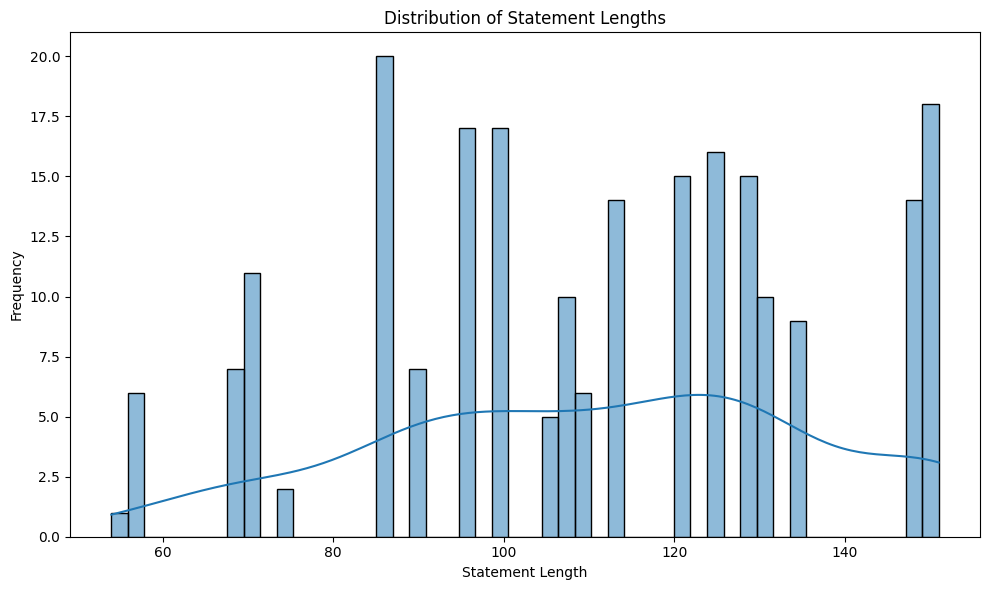

In [ ]:
# Calculate the length of each statement
df['statement_length'] = df['Statement'].apply(len)

# Create a histogram of statement lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['statement_length'], bins=50, kde=True)
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.title('Distribution of Statement Lengths')
plt.tight_layout()
plt.show()

## Our Findings
*We successfully loaded a CSV file containing parliamentary debate transcripts into a pandas DataFrame.*
*The dataset includes information on the debate's agenda, the speaker,and the terms used.*

*Through our initial checks, we have identified the following columns in the DataFrame:*

 **1.   Speaker**    
 **2.   Role**       
 **3.   Topic**      
 **4.   Statement**  
 **5.   Stance**     
 **6.   Sentiment**

*This **data understanding** serves as the foundation for further analysis,including data cleaning, exxploration of topic distributions, and text preparation for modeling.*

## 3.Data Preparation

# 3.1 Data Cleaning
*Our first step is to handle any missing values.Let's start by checking for missing values in the entire DataFrame.*
# 3.1.1 Handle Missing Values
*We will check for and handle missing values in the DataFrame.*

As we found in the initial column checks, there are no missing values in the DataFrame, so this step is complete.

# 3.2 Feature Engineering
*We can create new , useful features from our existing data. For text data, a valuable feature is the length of the text , as it can be a simple proxy for the complexity or verbosity of a speaker's contribution.*
*This was actually already created.*

# 3.3 Data Transformation
*Our text data is currently in string format.To prepare it for machine learning models, we need to convert it into a numerical representation .A common and simple approach is to convert the text into a format that can be used for text-based machine learning.This often involves cleaning the text by converting it to lowercase and removing special characters.*

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words (optional, but often helpful)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the 'Statement' column
df['processed_statement'] = df['Statement'].apply(preprocess_text)

# Display the first few rows with the new processed column
display(df[['Statement', 'processed_statement']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Statement,processed_statement
0,"Households are struggling, with food going bad...","[households, struggling, food, going, bad, stu..."
1,We have instructed ZESCO to improve transparen...,"[instructed, zesco, improve, transparency, pub..."
2,Citizens feel the government is not transparen...,"[citizens, feel, government, transparent, load..."
3,Government is engaging ZESCO to prioritize pow...,"[government, engaging, zesco, prioritize, powe..."
4,ZESCO has been accused of inefficiency and poo...,"[zesco, accused, inefficiency, poor, communica..."


*This text cleaning process is a fundamental part of data preparation for natural language processing (NLP) models. By converting all text to lowercase, we ensure that the models treats words like "Government"and "government"as the same,reducing the vocabulary size.Removing punctions and special characters also simplifies the text and can improve the models performance.*